In [1]:
import pandas as pd

df = pd.read_csv("list_attr_celeba.csv", encoding="utf-8")
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [2]:
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [3]:
columns_1 = ['image_id', 'Attractive']

X = df.drop(columns=columns_1, errors='ignore')
Y = df["Attractive"]

len(X.columns)

39

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Model

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, in_features=39, h1=20, h2=10, out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        
        return x

model = Model()

In [6]:
CrossEntropy = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [7]:
# -1 -> 0, 1 -> 1
X_train = (X_train + 1) // 2  
X_test = (X_test + 1) // 2    
Y_train = (Y_train + 1) // 2  
Y_test = (Y_test + 1) // 2    

X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
Y_train = torch.LongTensor(Y_train.values) 
Y_test = torch.LongTensor(Y_test.values)   

## Train

In [8]:
epochs = 200
eval_interval = 5
losses = []
val_losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)

    loss = CrossEntropy(y_pred, Y_train.long())
    losses.append(loss.detach().numpy())

    if i % eval_interval == 0:
        # val loss evaluation
        with torch.no_grad():
            y_eval = model.forward(X_test)
            val_loss = CrossEntropy(y_eval, Y_test)
            val_losses.append(val_loss)

        print(f"epoch: {i} | loss: {loss} | validation loss: {val_loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 | loss: 0.692637026309967 | validation loss: 0.6926676630973816
epoch: 5 | loss: 0.6651303768157959 | validation loss: 0.6661734580993652
epoch: 10 | loss: 0.614447832107544 | validation loss: 0.6169211268424988
epoch: 15 | loss: 0.5651809573173523 | validation loss: 0.568713366985321
epoch: 20 | loss: 0.5407207012176514 | validation loss: 0.5441046357154846
epoch: 25 | loss: 0.5286270976066589 | validation loss: 0.5315208435058594
epoch: 30 | loss: 0.5228182077407837 | validation loss: 0.5253875851631165
epoch: 35 | loss: 0.5190820097923279 | validation loss: 0.5215482115745544
epoch: 40 | loss: 0.5171281695365906 | validation loss: 0.5199459791183472
epoch: 45 | loss: 0.5157533884048462 | validation loss: 0.5187755823135376
epoch: 50 | loss: 0.5141862034797668 | validation loss: 0.517096996307373
epoch: 55 | loss: 0.5132859349250793 | validation loss: 0.5161657333374023
epoch: 60 | loss: 0.5126789212226868 | validation loss: 0.5156356692314148
epoch: 65 | loss: 0.51208424568

## Performance

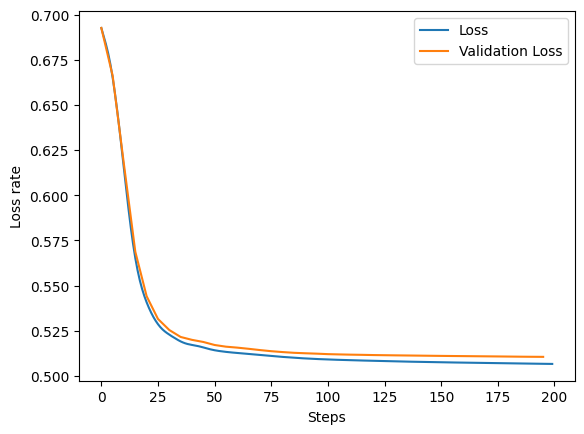

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses, label='Loss')
plt.plot(range(0, epochs, eval_interval), val_losses, label='Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss rate')
plt.legend()
plt.show()

manuel evaluation

In [10]:
example_image_id = "001989.jpg"  

df_target = df[df['image_id'] == example_image_id]

if df_target.empty:
    print(f"image_id {example_image_id} için veri bulunamadı.")
else:
    example_row = df_target.drop(columns=columns_1, errors='ignore')
    example_tensor = torch.FloatTensor(example_row.values)

    with torch.no_grad():
        model_output = model(example_tensor)

    prediction = torch.argmax(model_output, dim=1).item()

    print(f"model tahmini: {prediction} | asıl: {df_target["Attractive"].values[0]}")

model tahmini: 0 | asıl: 1


In [11]:
import random

num_samples = 1000
random_samples = df.sample(n=num_samples, random_state=1)

correct_predictions = 0

for index, row in random_samples.iterrows():
    example_image_id = row['image_id']  
    df_target = df[df['image_id'] == example_image_id]

    if df_target.empty:
        print(f"image_id {example_image_id} için veri bulunamadı.")
    else:
        example_row = df_target.drop(columns=columns_1, errors='ignore')
        example_tensor = torch.FloatTensor(example_row.values)

        with torch.no_grad():
            model_output = model(example_tensor)

        prediction = torch.argmax(model_output, dim=1).item()
        actual = (df_target["Attractive"].values[0] + 1) // 2
        
        print(f"Model tahmini: {prediction} | Asıl: {actual} | ID: {example_image_id}")

        if prediction == actual:
            correct_predictions += 1

accuracy = (correct_predictions / num_samples) * 100
print(f"Modelin doğru tahmin yüzdesi: {accuracy:.2f}%")

Model tahmini: 1 | Asıl: 1 | ID: 057206.jpg
Model tahmini: 1 | Asıl: 0 | ID: 075513.jpg
Model tahmini: 0 | Asıl: 0 | ID: 193255.jpg
Model tahmini: 0 | Asıl: 0 | ID: 125592.jpg
Model tahmini: 1 | Asıl: 0 | ID: 075807.jpg
Model tahmini: 0 | Asıl: 0 | ID: 093800.jpg
Model tahmini: 0 | Asıl: 0 | ID: 072050.jpg
Model tahmini: 0 | Asıl: 0 | ID: 003819.jpg
Model tahmini: 0 | Asıl: 1 | ID: 146129.jpg
Model tahmini: 1 | Asıl: 1 | ID: 082920.jpg
Model tahmini: 1 | Asıl: 1 | ID: 050103.jpg
Model tahmini: 1 | Asıl: 1 | ID: 037093.jpg
Model tahmini: 1 | Asıl: 0 | ID: 075608.jpg
Model tahmini: 1 | Asıl: 1 | ID: 037079.jpg
Model tahmini: 1 | Asıl: 1 | ID: 070722.jpg
Model tahmini: 1 | Asıl: 1 | ID: 023139.jpg
Model tahmini: 1 | Asıl: 1 | ID: 009130.jpg
Model tahmini: 0 | Asıl: 0 | ID: 019138.jpg
Model tahmini: 1 | Asıl: 1 | ID: 119985.jpg
Model tahmini: 1 | Asıl: 1 | ID: 031059.jpg
Model tahmini: 0 | Asıl: 1 | ID: 007242.jpg
Model tahmini: 0 | Asıl: 1 | ID: 174854.jpg
Model tahmini: 1 | Asıl: 0 | ID: